In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/credit-default.csv')

In [3]:
data.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee


In [4]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [5]:
#There are no missing values

In [6]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(exclude=np.number)

In [7]:
data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [8]:
cat_data.head(2)

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,telephone,foreign_worker,job
0,< 0 DM,critical,radio/tv,unknown,> 7 yrs,single male,none,real estate,none,own,yes,yes,skilled employee
1,1 - 200 DM,repaid,radio/tv,< 100 DM,1 - 4 yrs,female,none,real estate,none,own,none,yes,skilled employee


In [9]:
#Encoding
data['checking_balance'].unique()

array(['< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'], dtype=object)

In [10]:

data['checking_balance']=data['checking_balance'].replace({'unknown':np.nan})

In [11]:
# imputing null values in data['checking_balance']
data.groupby(['checking_balance'])['amount'].mean()

checking_balance
1 - 200 DM    3827.561338
< 0 DM        3175.218978
> 200 DM      2177.650794
Name: amount, dtype: float64

In [12]:
ind=data[data['checking_balance'].isnull()].index
for i in ind:
    if data.loc[i,'amount']>3700:
        data.loc[i,'checking_balance']='1 - 200 DM'
    elif data.loc[i,'amount']<2200:
        data.loc[i,'checking_balance']='> 200 DM'
    else:
        data.loc[i,'checking_balance']='< 0 DM'

In [13]:
data['checking_balance'].unique()
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [14]:
data['savings_balance'].unique()

array(['unknown', '< 100 DM', '501 - 1000 DM', '> 1000 DM',
       '101 - 500 DM'], dtype=object)

In [15]:

data['savings_balance']=data['savings_balance'].replace({'unknown':np.nan})                                                      

In [16]:
data['savings_balance'].unique()

array([nan, '< 100 DM', '501 - 1000 DM', '> 1000 DM', '101 - 500 DM'],
      dtype=object)

In [17]:
data.groupby(['savings_balance'])['amount'].mean()

savings_balance
101 - 500 DM     3384.038835
501 - 1000 DM    2572.111111
< 100 DM         3187.832504
> 1000 DM        2573.395833
Name: amount, dtype: float64

In [18]:
ind=data[data['savings_balance'].isnull()].index
for i in ind:
    if data.loc[i,'amount']>3400:
        data.loc[i,'savings_balance']='101 - 500 DM'
    elif data.loc[i,'amount']<2600:
        data.loc[i,'savings_balance']='501 - 1000 DM'
    elif ((data.loc[i,'amount']>3000)& ( data.loc[i,'amount']<3400)):
        data.loc[i,'savings_balance']='< 100 DM'    
    else:
        data.loc[i,'savings_balance']='> 1000 DM'

In [19]:
data['savings_balance'].isnull().sum()

0

In [20]:
data['employment_length'].unique()

array(['> 7 yrs', '1 - 4 yrs', '4 - 7 yrs', 'unemployed', '0 - 1 yrs'],
      dtype=object)

In [21]:
data['savings_balance']=data['savings_balance'].replace({'< 100 DM':0,'101 - 500 DM':1,'501 - 1000 DM':2,'> 1000 DM':3})
data['checking_balance']=data['checking_balance'].replace({'< 0 DM':0,'1 - 200 DM':1,'> 200 DM':2})


In [22]:
data['employment_length']=data['employment_length'].replace({'unemployed':0,'0 - 1 yrs':1,'1 - 4 yrs':2,'4 - 7 yrs':3,
                                                           '> 7 yrs':4 })

In [23]:
data['purpose'].unique()

array(['radio/tv', 'education', 'furniture', 'car (new)', 'car (used)',
       'business', 'domestic appliances', 'repairs', 'others',
       'retraining'], dtype=object)

In [24]:
data['property'].unique()

array(['real estate', 'building society savings', 'unknown/none', 'other'],
      dtype=object)

In [25]:
data['job'].unique()

array(['skilled employee', 'unskilled resident',
       'mangement self-employed', 'unemployed non-resident'], dtype=object)

In [26]:
data['telephone'].unique()

array(['yes', 'none'], dtype=object)

In [27]:
data['housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [28]:
data['foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

In [29]:
data['installment_plan'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [30]:
data['other_debtors'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [31]:
data['personal_status'].unique()

array(['single male', 'female', 'divorced male', 'married male'],
      dtype=object)

In [32]:
data['credit_history'].unique()

array(['critical', 'repaid', 'delayed', 'fully repaid',
       'fully repaid this bank'], dtype=object)

In [33]:
data=pd.get_dummies(data,columns=['personal_status','other_debtors','installment_plan','foreign_worker','housing',
                                   'telephone'])

In [34]:
tab1=data['purpose'].value_counts()

In [35]:
data['purpose']=data['purpose'].map(tab1)

In [36]:
tab2=data['property'].value_counts()

In [37]:
data['property']=data['property'].map(tab2)

In [38]:
tab3=data['job'].value_counts()

In [39]:
data['job']=data['job'].map(tab3)

In [40]:
tab4=data['credit_history'].value_counts()

In [41]:
data['credit_history']=data['credit_history'].map(tab4)

In [42]:
data['default']

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: default, Length: 1000, dtype: int64

In [43]:
# all the data has been encoded

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=AdaBoostClassifier()
clf5=GradientBoostingClassifier()
clf6=XGBClassifier()
clf7=KNeighborsClassifier()
clf8=GaussianNB()

In [46]:
# input and output data
inp=data.drop('default',axis=1)
out=data['default']
out=out.replace({2:0})
#default 1

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=.3,random_state=100)

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8],['LG','DT','RF','ADB','GB','XGB','KNN','GB']):
    score=cross_val_score(i,inp,out,cv=5,scoring='f1')
    bs=np.round(score.mean(),2)
    be=np.round(1-score.mean(),2)
    ve=np.round(score.std()/score.mean(),2)
    print(j, "Bias score:",bs, "Bias Error:",be, "Variance Error:",ve)
    

LG Bias score: 0.82 Bias Error: 0.18 Variance Error: 0.01
DT Bias score: 0.75 Bias Error: 0.25 Variance Error: 0.04
RF Bias score: 0.83 Bias Error: 0.17 Variance Error: 0.02
ADB Bias score: 0.83 Bias Error: 0.17 Variance Error: 0.01
GB Bias score: 0.84 Bias Error: 0.16 Variance Error: 0.01
[15:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/lear

In [50]:
# the two model 
#1.Random Forest with Bias score=.84 and Variance Error=.01
#2.GB Bias Score=.83 and Variance Error=.01

In [51]:
#Hyper Parameter Tuning
#1.Random Forest

In [52]:
from sklearn.model_selection import GridSearchCV
rf_mod=RandomForestClassifier()
parameter={'n_estimators':[10,15,20,40,60,70,80,90],
           'criterion':['gini','entropy'],
           'max_depth':[5,8,10,12,15,17,18,19,20]
          }

In [ ]:
hyp_mod=GridSearchCV(rf_mod,param_grid=parameter,scoring='f1')
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [55]:
tun_mod.best_score_


0.8432168779197221

In [56]:
tun_mod.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=80)

In [57]:
tun_mod.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 80}

In [58]:
final_model_RF=RandomForestClassifier(**tun_mod.best_params_)

In [59]:
final_model_RF.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=80)

In [60]:
#####
#2.GradientBoostingClassifier
gbc_mod=GradientBoostingClassifier()
parameter_gbc={'n_estimators':[5,8,10,20,30,40,50,60,70,80,85,90],
                'max_depth':[5,8,10,12,15,17,20],
                'learning_rate':[0.01,.1,1]
              }

In [61]:
hyp_mod_gbc=GridSearchCV(gbc_mod,param_grid=parameter_gbc,scoring='f1')
tun_mod_gbc=hyp_mod_gbc.fit(xtrain,ytrain)

In [62]:
tun_mod_gbc.best_score_

0.8331865015691797

In [63]:
tun_mod_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}

In [67]:
final_model_GB=GradientBoostingClassifier(**tun_mod_gbc.best_params_)
final_model_GB.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=8, n_estimators=60)

In [79]:
#############3
#threshold 
from sklearn.metrics import classification_report

In [83]:
# Random Forest
ypred=final_model_RF.predict(xtest)
yprob=final_model_RF.predict_proba(xtest)
for i in [.2,.3,.4,.5,.6,.7,.8,.9]:
    yprob1=yprob[:,1]
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob1>i]=1
    print("for threshold:",i)
    print( classification_report(ytest,ypred_th))
    print('////////////////////////////////////')

for threshold: 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.73      1.00      0.84       219

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300

////////////////////////////////////
for threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        81
           1       0.73      1.00      0.85       219

    accuracy                           0.74       300
   macro avg       0.87      0.51      0.45       300
weighted avg       0.81      0.74      0.63       300

////////////////////////////////////
for threshold: 0.4
              precision    recall  f1-score   support

           0       0.73      0.14      0.23        81
           1       0.75      0.98      0.85       219

    accuracy                           0.75       3

In [69]:
# AT a threshold of 0.6 the Random Forest model is doing better for both classes whereas for class 1 , f1 score at
# threshold 0.4 is maximum

In [68]:
#GradientBoostingClassifier
from sklearn.metrics import classification_report

ypred=final_model_GB.predict(xtest)
yprob=final_model_GB.predict_proba(xtest)
for i in [.2,.3,.4,.5,.6,.7,.8,.9]:
    yprob1=yprob[:,1]
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob1>i]=1
    print("for threshold:",i)
    print( classification_report(ytest,ypred_th))
    print('////////////////////////////////////')

for threshold: 0.2
              precision    recall  f1-score   support

           0       0.65      0.14      0.22        81
           1       0.75      0.97      0.85       219

    accuracy                           0.75       300
   macro avg       0.70      0.55      0.54       300
weighted avg       0.72      0.75      0.68       300

////////////////////////////////////
for threshold: 0.3
              precision    recall  f1-score   support

           0       0.62      0.20      0.30        81
           1       0.76      0.95      0.85       219

    accuracy                           0.75       300
   macro avg       0.69      0.58      0.57       300
weighted avg       0.72      0.75      0.70       300

////////////////////////////////////
for threshold: 0.4
              precision    recall  f1-score   support

           0       0.53      0.26      0.35        81
           1       0.77      0.91      0.84       219

    accuracy                           0.74       3

In [ ]:
# AT a threshold of 0.6 the gradient boosting classifier F1-score is maximum 0.84  along with improved performance 
# of class 0

In [85]:
##########
#roc curve
from sklearn.metrics import roc_curve
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=AdaBoostClassifier()
clf5=GradientBoostingClassifier()
clf6=XGBClassifier()
clf7=KNeighborsClassifier()
clf8=GaussianNB()
clf1.fit(xtrain,ytrain)
ypred1=clf1.predict(xtest)
yprob1=clf1.predict_proba(xtest)
clf1_class0_prob=yprob1[:,1]
clf2.fit(xtrain,ytrain)
ypred2=clf2.predict(xtest)
yprob2=clf2.predict_proba(xtest)
clf2_class0_prob=yprob2[:,1]
clf3.fit(xtrain,ytrain)
ypred3=clf3.predict(xtest)
yprob3=clf3.predict_proba(xtest)
clf3_class0_prob=yprob3[:,1]
clf4.fit(xtrain,ytrain)
ypred4=clf4.predict(xtest)
yprob4=clf4.predict_proba(xtest)
clf4_class0_prob=yprob4[:,1]
clf5.fit(xtrain,ytrain)
ypred5=clf5.predict(xtest)
yprob5=clf5.predict_proba(xtest)
clf5_class0_prob=yprob5[:,1]
#clf6.fit(xtrain,ytrain)
#ypred6=clf6.predict(xtest)
#yprob6=clf6.predict_proba(xtest)
#clf6_class0_prob=yprob6[:,1]
clf7.fit(xtrain,ytrain)
ypred7=clf7.predict(xtest)
yprob7=clf7.predict_proba(xtest)
clf7_class0_prob=yprob7[:,1]
clf8.fit(xtrain,ytrain)
ypred8=clf8.predict(xtest)
yprob8=clf8.predict_proba(xtest)
clf8_class0_prob=yprob8[:,1]

In [86]:
fpr1,tpr1,th1=roc_curve(ytest,clf1_class0_prob)
fpr2,tpr2,th2=roc_curve(ytest,clf2_class0_prob)
fpr3,tpr3,th3=roc_curve(ytest,clf3_class0_prob)
fpr4,tpr4,th1=roc_curve(ytest,clf4_class0_prob)
fpr5,tpr5,th1=roc_curve(ytest,clf5_class0_prob)
#fpr6,tpr6,th1=roc_curve(ytest,clf6_class0_prob)
fpr7,tpr7,th1=roc_curve(ytest,clf7_class0_prob)
fpr8,tpr8,th1=roc_curve(ytest,clf8_class0_prob)
from sklearn.metrics import roc_auc_score,recall_score,precision_score,accuracy_score

Text(0.5, 1.0, 'ROC')

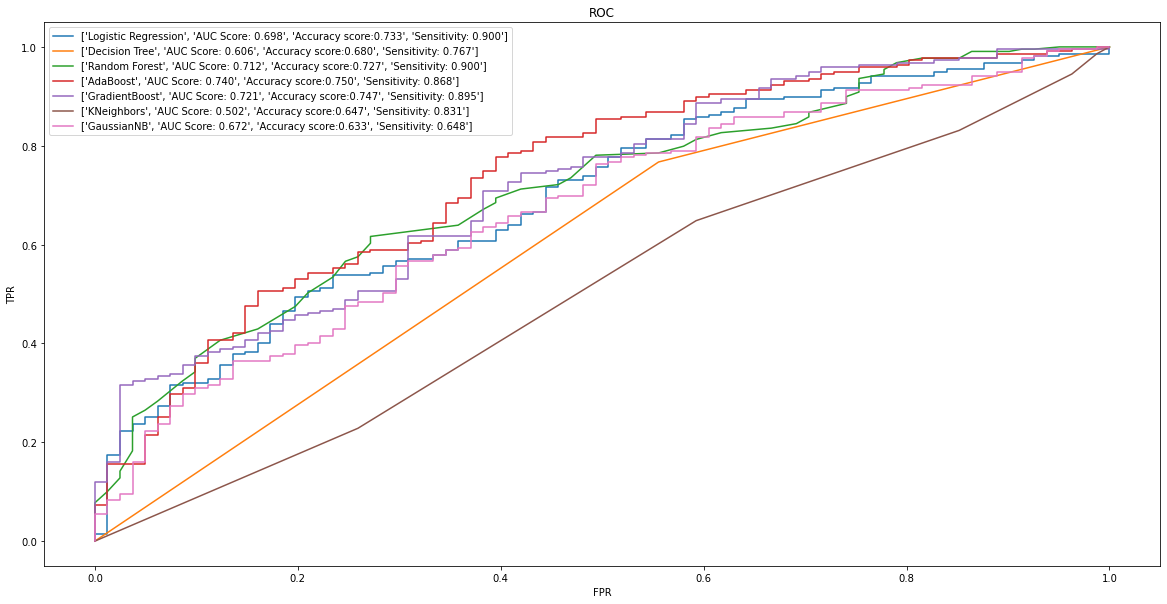

In [87]:
plt.figure(figsize=(20,10))
plt.plot(fpr1,tpr1,label=['Logistic Regression','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf1_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred1)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred1))])
plt.legend(loc='upper left')
plt.plot(fpr2,tpr2,label=['Decision Tree','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf2_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred2)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred2))])
plt.legend()

plt.plot(fpr3,tpr3,label=['Random Forest','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf3_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred3)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred3))])
plt.legend()
plt.plot(fpr4,tpr4,label=['AdaBoost','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf4_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred4)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred4))])
plt.legend()
plt.plot(fpr5,tpr5,label=['GradientBoost','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf5_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred5)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred5))])
#plt.plot(fpr6,tpr6)
plt.plot(fpr7,tpr7,label=['KNeighbors','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf7_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred7)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred7))])
plt.legend()
plt.plot(fpr8,tpr8,label=['GaussianNB','AUC Score: {:.3f}'.format(roc_auc_score(ytest,clf8_class0_prob)),'Accuracy score:{:.3f}'.format(accuracy_score(ytest,ypred8)),'Sensitivity: {:.3f}'.format(recall_score(ytest,ypred8))])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")